In [1]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math

In [2]:
# Menampilkan Sampel Data Dan Melakukan Drop Column Tertarik
df = pd.read_csv('../Dataset/kendaraan_train_pca_clean.csv')
df.sample(5)

,Component_1,Component_2,Tertarik
12564,2.426503,-0.000733,0
142331,-1.829044,0.579858,0
115679,-2.246901,0.251286,0
1000,0.416976,0.208717,0
172936,2.089051,-0.292311,0


In [3]:
# Mengecek Data Kosong
df.isna().sum()

Component_1    0
Component_2    0
Tertarik       0
dtype: int64

## **Feature Selection**

In [4]:
df = df[['Component_1', 'Component_2']]
df.head()

,Component_1,Component_2
0,-2.178823,0.271841
1,3.014007,0.124504
2,-2.211770,0.252479
3,2.379107,0.550604
4,-2.270448,0.208164


In [5]:
# Mengecek Total Data Pada Dataframe
print("Total Data :", len(df))

Total Data : 230631


## **K-MEANS Algorithm**

In [6]:
# Mendefinisikan Metode Euclidean Untuk Perhitungan Jarak Dari Centroid
def euclidean(x, y):
    return math.sqrt(sum((x - y)**2))


def kmeans(k, max_iter, df):

    # Inisialisasi Dictionary Centroid Kemudian Memilih Centroid Secara Random Pada Data
    # Sesuai Banyaknya Cluster Yang Didefinisikan
    centroid = {i: df[random.randint(0, len(df))] for i in range(k)}
    print(f'Inisialisasi Centroid Random:\nCluster 0: {centroid.get(0)}, Cluster 1: {centroid.get(1)}, Cluster 2: {centroid.get(2)} \n')

    # Mengcopy Centroid Saat Ini Untuk Acuan Pemberhentian Proses Iterasi Centroid Maksimal
    temp_centroid = centroid.copy()

    for i in range(max_iter):
        # Mendefinisikan Dictionary Cluster Dan Mengisi Setiap Key
        # Pada Cluster Berisi Array kosong, contoh : {0: [], 1: [], 2: []}
        cluster = {i: [] for i in range(k)}

        # Mencari Nilai Terdekat Pada Data Untuk Setiap Centroid Yang Telah Di Definisikan Sebelumnya
        # Menggunakan Metode Euclidean Dan Mencari Nilai Minimum Pada Setiap Distance
        # Untuk Dimasukkan Kedalam Dictionary Cluster
        for x in df:
            dist = [euclidean(x, centroid[c]) for c in centroid]
            cluster[dist.index(min(dist))].append(x)

        # Mencari Nilai Centroid Ulang Dari Setiap Cluster
        # Yang Telah Dicari Sebelumnya Menggunakan Mean
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl], axis=0)

        print(f'Iterasi Centroid Ke-{i+1}:\nCluster 0: {centroid.get(0)}, Cluster 1: {centroid.get(1)}, Cluster 2: {centroid.get(2)} \n')

        # Pemberhentian Proses Iterasi Ketika Centroid Saat Ini Sama Dengan Nilai Centroid Sebelumnya
        # Dilakukan Dengan Pengecekan Masing-Masing Value Dari Dictionary
        if ((temp_centroid.get(0) == centroid.get(0))[0] and
            (temp_centroid.get(1) == centroid.get(1))[0] and
            (temp_centroid.get(2) == centroid.get(2))[0] and
            (temp_centroid.get(3) == centroid.get(3))[0]):
            break

        # Mengcopy Centroid Yang Telah Berubah Dari Perhitungan Sebelumnya
        temp_centroid = centroid.copy()

    # Mengembalikan Nilai Dari Variabel Centroid Dan Cluster
    return centroid, cluster


## **Main Program**

In [7]:
# Merubah DataFrame Menjadi Numpy Array
data = df.to_numpy()

# Memasukkan Nilai K dan Maksimum Iterasi
k = 4
max_iter = 30

# Memanggil Fungsi kmeans Yang Akan Mengembalikan Nilai Centroid Dan Cluster
centroid, cluster = kmeans(k, max_iter, data)

Inisialisasi Centroid Random:
Cluster 0: [ 1.94156065 -0.42051193], Cluster 1: [-1.08554319 -1.61290774], Cluster 2: [-0.9139128 -2.402551 ] 

Iterasi Centroid Ke-1:
Cluster 0: [1.67482023 0.0828714 ], Cluster 1: [-0.5505437  -1.21306118], Cluster 2: [-0.5554068  -2.09905011] 

Iterasi Centroid Ke-2:
Cluster 0: [1.71628682 0.21899181], Cluster 1: [-0.22136573 -1.08578954], Cluster 2: [-0.49259998 -2.02833082] 

Iterasi Centroid Ke-3:
Cluster 0: [1.7496318  0.34563448], Cluster 1: [ 0.12218167 -1.04234112], Cluster 2: [-0.54933194 -1.99408455] 

Iterasi Centroid Ke-4:
Cluster 0: [1.7848414  0.48564731], Cluster 1: [ 0.60497243 -0.99971451], Cluster 2: [-0.69222744 -1.82849139] 

Iterasi Centroid Ke-5:
Cluster 0: [1.81243479 0.65817938], Cluster 1: [ 0.96369957 -0.92796264], Cluster 2: [-0.69747155 -1.72425612] 

Iterasi Centroid Ke-6:
Cluster 0: [1.80199539 0.82905543], Cluster 1: [ 1.15325084 -0.83066496], Cluster 2: [-0.66378867 -1.68944906] 

Iterasi Centroid Ke-7:
Cluster 0: [1.7506

## **Hasil Proses Cluster Final**

In [8]:
# Inisialisasi Array Untuk Dat Cluster
df = []

# Melakukan Perulangan Untuk Setiap Key Pada Data
# Hasil Proses K-Means Untuk Diinputkan Kedalam Array Cluster (df)
for key in cluster.keys():
    for c in cluster.get(key):
        df.append((c[0], c[1], key))

# Set Array df menjadi dataframe, Menamakan nama kolom dan menampilkannya
df = pd.DataFrame(df)
df.columns = ['Component_1', 'Component_2', 'Cluster']
df.sample(10)

,Component_1,Component_2,Cluster
2089,2.811341,2.054189,0
134203,-0.502366,-2.015485,2
55909,1.442178,-0.802238,1
133332,-1.579982,-1.057188,2
165673,-1.956137,0.485767,3
194154,-2.107810,0.340639,3
90683,2.291276,-0.150777,1
17612,1.881223,1.368813,0
43060,1.783869,-0.525886,1
61567,2.400429,-0.038149,1


In [9]:
# Menampilkan Letak Seluruh Centroids
for i in range(k):
    print(f'Centroid {i+1} :', centroid[i])

Centroid 1 : [0.48859424 1.6630986 ]
Centroid 2 : [ 1.99540974 -0.30710299]
Centroid 3 : [-0.31881382 -1.52651775]
Centroid 4 : [-1.97855515  0.33574245]


In [10]:
# Memetakkan Nilai X Dan Y Untuk Setiap Data Pada Dictionary Cluster
clusterize = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in cluster.items()]))

# Membuat Nama Kolom Cluster Berdasarkan Jumlah Cluster Pada Clusterize
col = []
for i in range(len(clusterize.columns)):
    col.append('Cluster ' + str(i + 1))

# Melakukan Set Nama Kolom Dan Menampilkan Sample Data Cluster
clusterize.columns = col
clusterize.sample(8)


,Cluster 1,Cluster 2,Cluster 3,Cluster 4
21572,"[-0.1813497190422023, 0.6762293028939982]","[3.770294608584266, 0.7488656211771185]","[-1.350084974740092, -0.9975143376507132]","[-1.61049640249497, 0.7845588819957053]"
25380,"[1.3814177850198124, 2.811623698569663]","[1.4646001696848134, -0.775860548645855]","[-0.9887974653414784, -2.4296013332901003]","[-1.9527923368168227, 0.5065139224047202]"
15251,"[-0.5168667251122039, 1.317508392852098]","[1.42602982141965, 0.0250160709571086]","[-0.2229754697309343, -1.8150201717161627]","[-2.0502663103501204, -0.5412192218003999]"
48308,NaN,"[1.7791586739692558, -0.5357380594423168]",NaN,"[-1.8130338548732865, 0.5985538313833134]"
55230,NaN,"[1.8739927816529955, -0.3321788717618316]",NaN,"[-2.5274374507512443, 0.002862581905907]"
55382,NaN,"[1.913874122474636, -0.3307392287587535]",NaN,"[-1.5165055628790982, 0.8611521918372754]"
22029,"[2.0816452150256497, 1.5435913774773464]","[1.856017327113867, -0.4772020904655527]","[0.7449041931506041, -1.351171631025067]","[-2.5363799078380773, 0.0049917140069931]"
67772,NaN,"[1.3218868647760456, -0.0537671149695394]",NaN,"[-1.7761069019572098, -0.3257937323630199]"


## **Visualisasi Cluster**

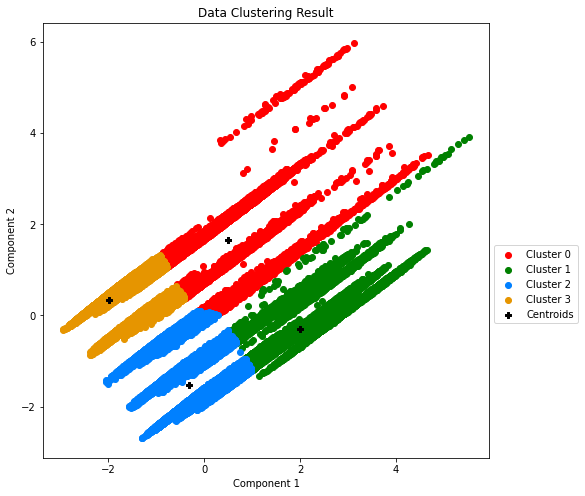

In [11]:
# Set Warna Setiap CLuster
colors = ['r', 'g', '#0080ff', '#e69500', '#e89500']

# Set Ukuran Dan Judul Plot
plt.figure(figsize=(8, 8))
plt.title('Data Clustering Result')

# Melakukan Looping Setiap Titik Data Dan Centroid
for i in range(k):
    plt.scatter(
        df['Component_1'][df['Cluster'] == i], 
        df['Component_2'][df['Cluster'] == i],
        color=colors[i],
        label=f'Cluster {i}'
    )

    plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='P')

# Acuan Penampilan Label Centroid
plt.scatter(centroid[0][0], centroid[0][1], color='k', label="Centroids", marker='P')

# Set Nama Label X Dan Y Pada Plot Dan Set Tempat Legend Ditampilkan
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()


## **Evaluasi Model**

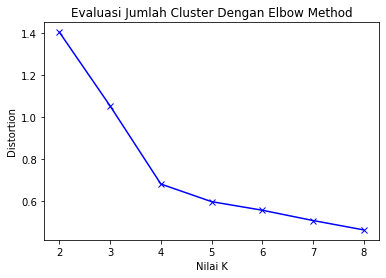

In [12]:
# Inisialisasi Array Untuk Distortion
distortions = []

# Inisialisasi Range K
K = range(2, 9)

# Melakukan Perulangan Untuk Setiap Range
for i in K:
    # Membangun Dan Fit Dataset
    model = KMeans(n_clusters=i).fit(df)
    model.fit(df)

    # Memasukkan Hasil Dari Jumlah cdist data, cluster_center Ke Array
    distortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Plot data
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nilai K')
plt.ylabel('Distortion')
plt.title('Evaluasi Jumlah Cluster Dengan Elbow Method')
plt.show()